In [7]:
using LinearAlgebra
using Plots; plot();

## Investigating Interpretations of the Backward Shift Operator

In [51]:
function generate_time_series(xmin, xmax)
    # Define the domain and function of interest
    domain = xmin:.01:xmax
    f(t) = t^2 * sin(t)
    normalizing_constant = f(domain[end])

    # Normalize function to squash out large signals
    actual_f(t; noise=.05) = (f(t) / normalizing_constant) + noise*randn()

    zt = actual_f.(domain)
    reverse!(zt)
    zt, zt_minus = zt[1], zt[2:end]
    return zt, zt_minus, domain, actual_f
end

generate_time_series (generic function with 2 methods)

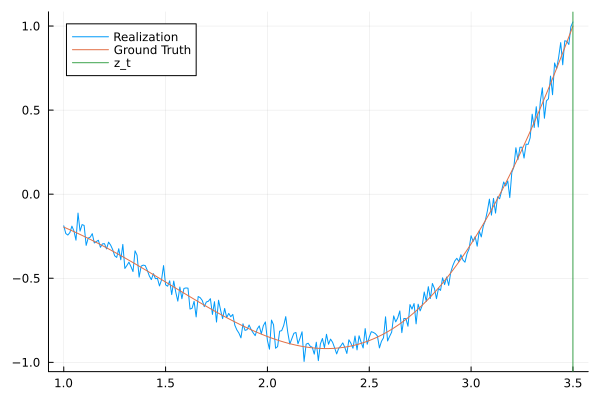

In [57]:
zt, zt_minus, domain, actual_f = generate_time_series(1., 3.5)
plot(domain, reverse([zt; zt_minus]), label="Realization")
plot!(domain, actual_f.(domain; noise=0.), label="Ground Truth")
vline!([domain[end]], label="z_t")

We have the backward difference operator defined below:
$$
\nabla z_t = z_t - z_{t-1} = \left(1 - B\right)z_t
$$
Similarly, we have the backward shift operator defined below:
$$
Bz_t = z_{t-1}
$$
Then we have that $\hat{B}Bz_t = z_{t-2}$.

In [54]:
function backward_shift_operator(zt, zt_minus1)
    return zt_minus1 / zt
end

backward_shift_operator (generic function with 1 method)

In [60]:
all_zt = [zt; zt_minus]
M = length(all_zt) - 1
Bs = zeros(M)

for i in 1:M
    B = backward_shift_operator(all_zt[i], all_zt[i+1])
    Bs[i] = B
end

In [64]:
recover_zt = zeros(length(all_zt))
recover_zt[1] = zt

for (i, B) in enumerate(Bs)
    recover_zt[i+1] = B*recover_zt[i]
end

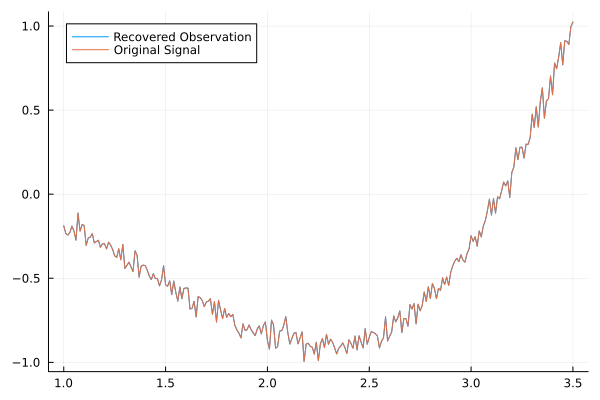

In [66]:
plot(domain, reverse(recover_zt), label="Recovered Observation")
plot!(domain, reverse(all_zt), label="Original Signal")

Recall, that the forward operator is defined in terms of the backwards opeartor as follows:
$$
F = B^{-1}
$$

In [83]:
recover_zt_forward = zeros(length(all_zt))
recover_zt_forward[1] = zt_minus[end]

for (i, B) in enumerate(reverse(Bs))
    F = inv(B) # B^(-1) or (1/B)
    recover_zt_forward[i+1] = F*recover_zt_forward[i]
end

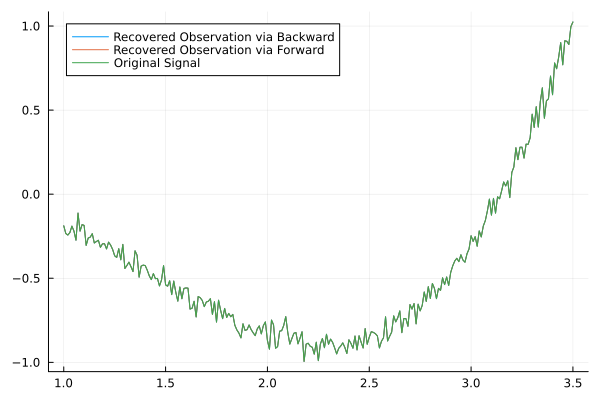

In [85]:
plot(domain, reverse(recover_zt), label="Recovered Observation via Backward")
plot!(domain, recover_zt_forward, label="Recovered Observation via Forward")
plot!(domain, reverse(all_zt), label="Original Signal")